# <center>Sentiment Analysis in Python</center>


# What is this about?

Sentiment analysis tools are much more needed now a days. For knowing about the sentiment of a tweets, posts, product reviews, news, blog articles and any other data posted online.

Its very hard for machine to understand the human experience, tone, attitude, emotion. But combination of linguistic + computer science techniques can help.

These tools are based on machine learning and deep learning models. Here I tried to explore different models by which we can analyse sentiment of a text data.

I will broadly explore three type of technique to determine the sentiment of a text which are: 
 - "Lexical Analysis ( Rule Based Approch ) VADER Model"
 - RNNs (Deep Learning)
 - classifiers (Machine Learning) or ROBERTA Model Hugging face extension of BERT Model

I will start with a simplest one rule based model, Although this is the hardest model to implement from scratch So i will use NLTK's (Natural Language Tool Kit 'A python Natural language library') VADER' Model.


## The VADER (Valence Aware Dictionary for sEntiment Reasoning) Model
    This is a lexicon and rule based approch having grammatical rules and syntatical convention insted of machine learning approch. The model constructed a huge dictionary of sentiment features. It not only contain words, but also phrases (such as “bad ass” and “the bomb”), emoticons (such as “:-)”) and sentiment-laden acronyms (such as “ROFL” and “WTF”).
    The model returns a polarity and intensity scores from 0 to 1 or a compound score form -1 to 1 to the text, word feeded to the model.

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

#### Reading a amazon fine food reviews data-set. I will be only working with the first 100 reviews.

In [3]:
df = pd.read_csv('archive/Reviews.csv')[:100]

In [4]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
df.Text[2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

In [6]:
df = df[['Id', 'ProfileName', 'Summary', 'Score', 'Text']]

In [7]:
df.head(3)

,Id,ProfileName,Summary,Score,Text
0,1,delmartian,Good Quality Dog Food,5,I have bought several of the Vitality canned d...
1,2,dll pa,Not as Advertised,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",4,This is a confection that has been around a fe...


#### A very quick EDA on data-set!!

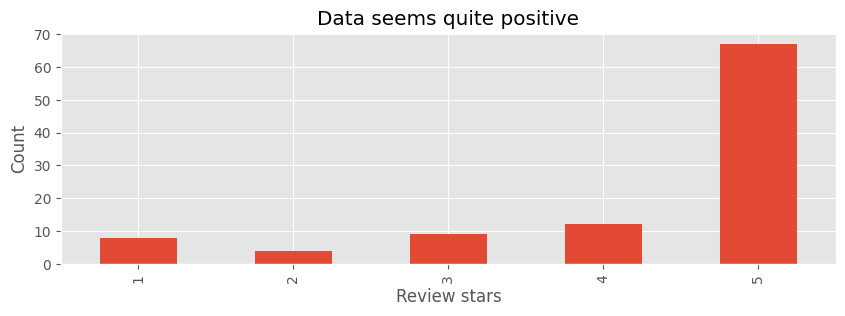

In [8]:
df.Score.value_counts().sort_index() \
    .plot(
        kind = 'bar',
        title = 'Data seems quite positive',
        figsize = (10, 3),
        xlabel = 'Review stars',
        ylabel = 'Count'
        )
plt.show()

#### I will be using SentimentIntensityAnalyzer from nltk. It is based on VADER Model..!

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Kushagra
[nltk_data]     Chaturvedi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('How did no one find it good.')

{'neg': 0.218, 'neu': 0.495, 'pos': 0.287, 'compound': 0.1779}

#### VADER Model Scores as 'vs' 

In [58]:
vs = pd.Series(map(lambda x: sia.polarity_scores(x)['compound'], df.Text))

## Its looks like VADER Model results are pretty positive too...!

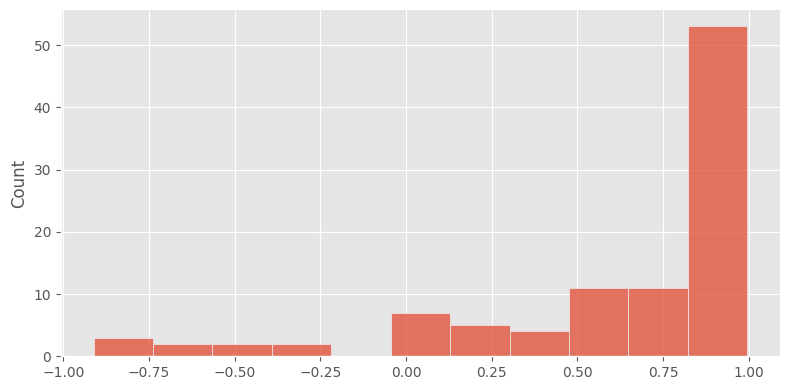

In [66]:
sns.displot(vs, aspect = 2, height = 4)
plt.show()

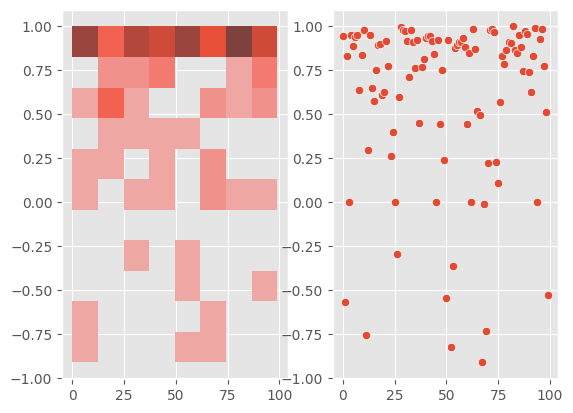

In [76]:
fig, ax = plt.subplots(1, 2)
sns.histplot(x = vs.index, y = vs , ax = ax[0])
sns.scatterplot(x = vs.index, y = vs , ax = ax[1])
plt.show()

#### Now What next ROBERTA or RNN?